### Wine Review Analysis:

Wine Reviews
130k wine reviews with variety, location, winery, price, and description..
https://www.kaggle.com/zynicide/wine-reviews

In [28]:
# Load some important tools;

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  We will load the NLP tools when we are closer to breaking down the reviews.

In [29]:
df_wine = pd.read_csv("Data/winemag-data-130k-v2.csv")
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [30]:
#Let's get rid of that Unnamed column of no name...
df_wine = df_wine.drop(['Unnamed: 0'], axis=1)
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [31]:
df_wine.shape

(129971, 13)

In [32]:
df_wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [33]:
df_wine.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [38]:
#  ???!!!  Duplicate descriptions?  That's curious.  - 10,016 duplicate descriptions.

dups = df_wine[df_wine.duplicated(['description'])]
print("Duplicate Descriptions: ",dups['description'], sep='\n')

Duplicate Descriptions: 
2408      This is weighty, creamy and medium to full in ...
2409      There's a touch of toasted almond at the start...
2410      Lightly herbal strawberry and raspberry aromas...
2412      The Monica grape often shows a rustic or raw q...
2413      Fruity and lightly herbaceous, this has fine t...
                                ...                        
129879    This wine is a blend of 45% Grenache, 37% Syra...
129880    Apple blossom intrigues on the nose of this li...
129881    This Verdejo smells like citrus fruits and wil...
129882    This wine is mostly Cabernet Sauvignon (78%), ...
129913    This is taut and dense, and requires time and ...
Name: description, Length: 10016, dtype: object


In [39]:
# check for all duplicates on all columns. - 9983 rows duplicated all across the db.  maybe we can whack these.
dups = df_wine[df_wine.duplicated()]
print("Duplicate Descriptions: ",dups['description'], sep='\n')

Duplicate Descriptions: 
2408      This is weighty, creamy and medium to full in ...
2409      There's a touch of toasted almond at the start...
2410      Lightly herbal strawberry and raspberry aromas...
2412      The Monica grape often shows a rustic or raw q...
2413      Fruity and lightly herbaceous, this has fine t...
                                ...                        
129879    This wine is a blend of 45% Grenache, 37% Syra...
129880    Apple blossom intrigues on the nose of this li...
129881    This Verdejo smells like citrus fruits and wil...
129882    This wine is mostly Cabernet Sauvignon (78%), ...
129913    This is taut and dense, and requires time and ...
Name: description, Length: 9983, dtype: object


In [ ]:
# Check for missing data / Nans.
# which columns are a NO GO with NaNs?  - Description - Price - Points - Variety - province - region1( 21,000 NaNs yikes)

Initially, there are

43 different countries
21 different ratings
390 different prices

19 different critics with 15 twitter handles

707 different varieties

16757 different wineries

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

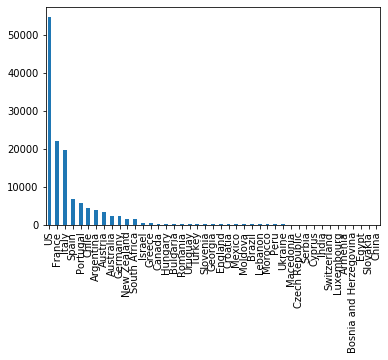

In [16]:
df_wine['country'].value_counts().plot(kind='bar')
df_wine['country'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

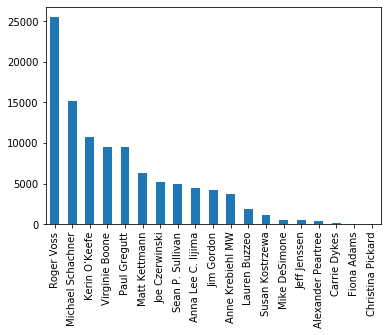

In [17]:
df_wine['taster_name'].value_counts().plot(kind='bar')
df_wine['taster_name'].value_counts()

In [26]:
#df_wine['variety'].value_counts().plot(kind='bar')  TOO MANY!
df_wine['variety'].value_counts().loc[lambda x : x>1000]

## IT appears that the top 17 varieties (+2000 reviews) comprise of 72% of all reviews. Might be worth looking at this set
## correlating between description and variety.

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [40]:
import seaborn as sns

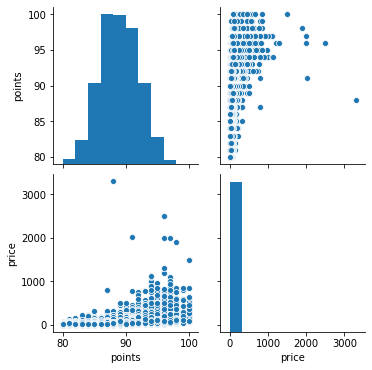

In [41]:
sns.pairplot(df_wine)

In [ ]:
### Initially not very interesting, however, there are significant outliers and an obvious linear relationship 
### between points(rating) and price.